In [1]:
%load_ext autoreload
%autoreload 2
import physquirrel as sq


In [2]:
my_split = sq.Split({1,2,5},{3,4,6})
split_set = my_split.induced_quartetsplits()
split_set.splits.update({sq.Split({1,2},{3,5}), sq.Split({1,3},{2,5}), sq.Split({3,4}, {2,6}),sq.Split({3,6}, {4,5})})
print(split_set)

###########
my_quartet_split = split_set.obtain_split({1,2,3,4})
print(my_quartet_split.weight)
############

n_splits = len(split_set.splits)
quarnets = [sq.QuartetTree(split, weight = round(1/2 + i/(2*n_splits),2)) for i, split in enumerate(split_set.splits)]
Q = sq.QuarnetSet(quarnets)
for q in Q.quarnets:
    print(q, q.split.weight)


split_set.bstar()
print('hi')
my_splits = split_set.bstar_penalty(threshold=50)
penalties = [split.penalty for split in my_splits]
print(my_splits)
print(penalties)

QuartetSplitSet([Split({1, 5}, {3, 6}), Split({1, 2}, {3, 6}), Split({2, 5}, {4, 6}), Split({1, 2}, {4, 6}), Split({2, 5}, {3, 4}), Split({2, 5}, {3, 6}), Split({1, 2}, {3, 5}), Split({1, 3}, {2, 5}), Split({3, 4}, {2, 6}), Split({1, 5}, {3, 4}), Split({1, 2}, {3, 4}), Split({1, 5}, {4, 6}), Split({3, 6}, {4, 5})])
1
(QT: 1 5 | 3 6) 0.5
(QT: 2 5 | 4 6) 0.58
(QT: 1 2 | 3 6) 0.54
(QT: 1 2 | 4 6) 0.62
(QT: 2 5 | 3 4) 0.65
(QT: 2 5 | 3 6) 0.69
(QT: 1 2 | 3 5) 0.73
(QT: 1 3 | 2 5) 0.77
(QT: 3 4 | 2 6) 0.81
(QT: 1 5 | 3 4) 0.85
(QT: 1 2 | 3 4) 0.88
(QT: 1 5 | 4 6) 0.92
(QT: 3 6 | 4 5) 0.96
hi
SplitSystem([Split({4, 6}, {1, 2, 3, 5}), Split({1, 5}, {2, 3, 4, 6}), Split({1, 4, 6}, {2, 3, 5}), Split({1, 5, 6}, {2, 3, 4}), Split({2, 5, 6}, {1, 3, 4}), Split({4, 5}, {1, 2, 3, 6}), Split({4, 5, 6}, {1, 2, 3}), Split({1, 3, 5, 6}, {2, 4}), Split({1, 4}, {2, 3, 5, 6}), Split({1, 6}, {2, 3, 4, 5}), Split({3}, {1, 2, 4, 5, 6}), Split({1, 4, 5, 6}, {2, 3}), Split({1, 3, 6}, {2, 4, 5}), Split({1, 2}, {3

In [3]:
my_quartet_tree_set = Q.weighted_quartetsplits_set()
split_scores = my_quartet_tree_set.bstar_penalty(threshold=0.9)
sorted_splits = split_scores.list_sorted_penalties()

for split in sorted_splits:
    print(split, split.penalty)

Split({1, 2, 5}, {3, 4, 6}) 0
Split({4}, {1, 2, 3, 5, 6}) 0
Split({2}, {1, 3, 4, 5, 6}) 0
Split({1}, {2, 3, 4, 5, 6}) 0
Split({5}, {1, 2, 3, 4, 6}) 0
Split({6}, {1, 2, 3, 4, 5}) 0
Split({3}, {1, 2, 4, 5, 6}) 0
Split({2, 5}, {1, 3, 4, 6}) 0
Split({1, 5}, {2, 3, 4, 6}) 0.77
Split({1, 2}, {3, 4, 5, 6}) 0.77
Split({3, 6}, {1, 2, 4, 5}) 0.81


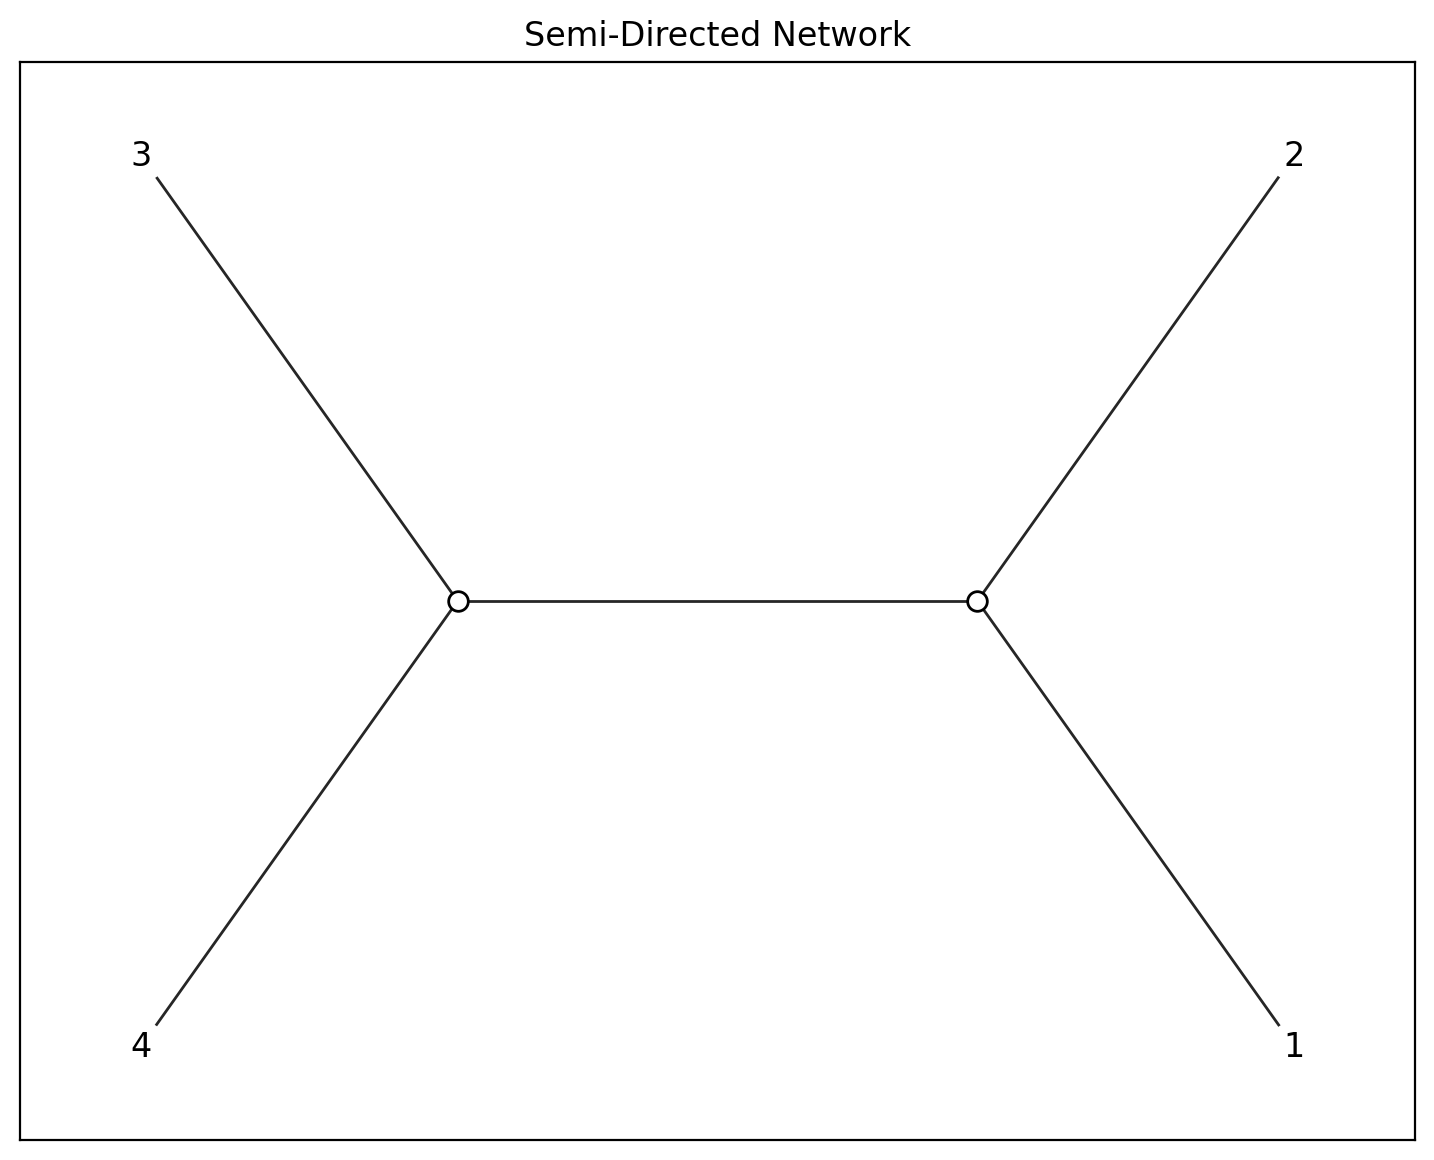

<Axes: title={'center': 'Semi-Directed Network'}>

In [4]:
S = sq.SplitSystem({sq.Split({1},{2,3,4}), sq.Split({2}, {1,3,4}), sq.Split({3}, {1,2,4}), sq.Split({4}, {1,2,3}), 
                    sq.Split({1,2},{3,4})})
T = S.displayed_tree()
T.visualize()

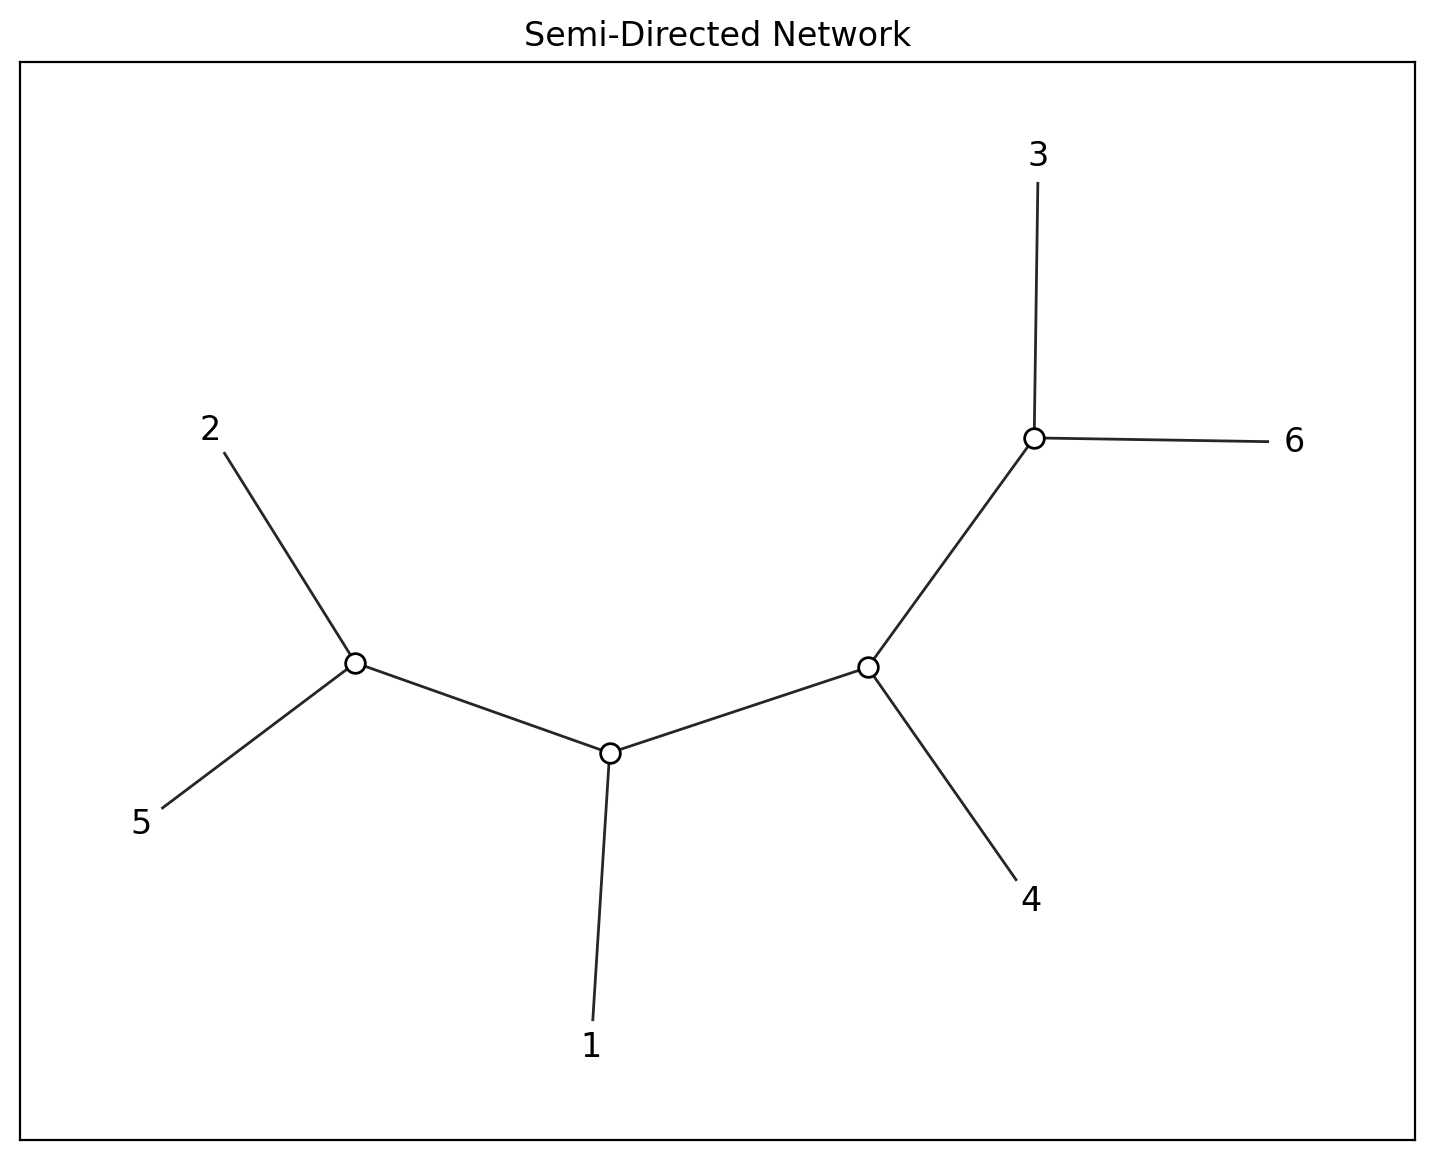

Split({1, 2, 5}, {3, 4, 6}) 0
Split({2, 5}, {1, 3, 4, 6}) 0
Split({4}, {1, 2, 3, 5, 6}) 0
Split({2}, {1, 3, 4, 5, 6}) 0
Split({5}, {1, 2, 3, 4, 6}) 0
Split({6}, {1, 2, 3, 4, 5}) 0
Split({3}, {1, 2, 4, 5, 6}) 0
Split({1}, {2, 3, 4, 5, 6}) 0
Split({3, 6}, {1, 2, 4, 5}) 0.81


In [11]:
treeset = split_scores.build_trees_bstar_greedy()
tree, tree_splitsystem = treeset[-1].values()
tree.visualize()

sorted_tree_splits = tree_splitsystem.list_sorted_penalties()
for split in sorted_tree_splits:
    print(split, split.penalty)